# GUIA 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import multivariate_normal
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.mixture import GaussianMixture
from scipy.stats import gamma, norm
from scipy.special import digamma
from scipy.stats import norm as normal
from scipy.stats import t
from scipy import stats
import scipy

### Ejercicio 1

![image.png](enunciados/ej1.png)

a)

Del enunciado se tienen los siguientes datos

$\tau$: Precision de Lucas

$D$: Punto de impacto del tiro de Lucas 

$X$: Coordenada del punto de impacto del tiro de lucas

$$X|_{\tau} \sim \mathcal{N}(0, \frac{1}{\tau})$$

$$\tau \sim \chi^2_8$$

$$D \sim U(X, 0)$$

$$\sum_{i=1} ^{10} x_i^{2} = 17 $$


Queremos calcular la distribucion a posteriori $p(\tau | x)$, es decir, la precision de Lucas luego de que hemos observado los datos de sus 10 tiros (la sumatoria).

Por Bayes tenemos que 

$$ p(\tau | x) \propto p(x | \tau) \cdot p(\tau)$$


Comenzamos calculando $ p(x | \tau) $

$p(x_i | \tau) = \frac{\sqrt{\tau}}{\sqrt{2 \pi}} \exp (-\frac{\tau}{2} x_i^{2})$

Si multiplicamos para n=10 (ya que observamos 10 tiros)

$p(x | \tau) = \prod_{i=1} ^{10} p(x_i | \tau) =\left ( \frac{\sqrt{\tau}}{\sqrt{2 \pi}} \right) ^{10} \cdot \exp( -\frac{\tau}{2} \sum_{i=1} ^{10}  x_i^{2})$

Ahora calculamos $p(\tau)$, que como sabemos que $\tau \sim \chi^2_8$, queda


$p(\tau) = \frac{1}{2^{8/2} \Gamma(\frac{8}{2})} \tau^{\frac{8}{2}-1} \exp{(-\frac{\tau}{2})} \mathbb{1}\{x>0\} $

$ p(\tau) = \frac{1}{96} \tau^3 \exp{(- \frac{\tau}{2})} \mathbb{1}\{x>0\}  $


Reemplazando en la formula de Bayes


$ p(\tau | x) \propto \left ( \frac{\sqrt{\tau}}{\sqrt{2 \pi}} \right) ^{10} \cdot \exp( -\frac{\tau}{2} \sum_{i=1} ^{10}  x_i^{2}) \cdot \frac{1}{96} \tau^3 \exp{(- \frac{\tau}{2})} \mathbb{1}\{x>0\} $



$ p(\tau | x) \propto \left ( \frac{\sqrt{\tau}}{\sqrt{2 \pi}} \right) ^{10} \cdot \exp( -\frac{\tau}{2} 17) \cdot \frac{1}{96} \tau^3 \exp{(- \frac{\tau}{2})} \mathbb{1}\{x>0\} $

$ p(\tau | x) \propto \alpha \cdot \tau^8 \cdot \exp(-9\tau) \mathbb{1}\{x>0\}$

Esta ultima expresion fue "acomodada" para parecerse a una distribucion $\Gamma(\nu=9, \lambda=9)$, por lo que es necesario que $\alpha = \frac{9^9}{\Gamma(9)}$


De este modo, 

$$ \tau|x \sim \Gamma(\nu=9, \lambda=9) $$









b) la distribucion predictiva describe el comportamiento de una nueva observacion, teniendo en cuenta lo calculado anteriormente.

Como vimos, la distribucion a posteriori de $\tau$ es $ \tau|x \sim \Gamma(\nu=9, \lambda=9) $.

Como lo indica el enunciado, una nueva observacion $X_n$ dado que se conoce el parametro $\tau$ seguira teniendo una distribucion normal al igual que X, por lo que se sigue cumpliendo que

$$ X_n | \tau  \sim \mathcal{N}(0, \frac{1}{\tau}) $$

Ahora, la distribucion predictiva de $X_n$ es la integral de la distribucion condicional de $X_n$, multiplicada por la posteriori de $\tau$


$$ p(X_n | x) = \int _{0} ^{\infty} p(X_n | \tau) \cdot p(\tau | x)  d\tau$$


Calculando por partes

$ p(X_n | \tau) = \frac{1}{\sqrt{\frac{2 \pi}{\tau}}} \exp(-\frac{\tau X_n^{2}}{2} ) $ 

$ p(\tau | x) = \frac{9^9}{\Gamma(9)} \tau^8 e^{-9 \tau} $

Reemplazando en la integral


$ p(X_n | x) = \int _{0} ^{\infty} \frac{1}{\sqrt{\frac{2 \pi}{\tau}}} \exp(-\frac{\tau X_n^{2}}{2}) \cdot \frac{9^9}{\Gamma(9)} \tau^8 e^{-9 \tau} d\tau$

$  p(X_n | x) = \frac{9^9}{\Gamma(9)} \cdot \frac{1}{\sqrt{2\pi}} \int _{0} ^{\infty} \tau^{\frac{17}{2}} \cdot \exp{(-\tau (\frac{X_n^{2}}{2}+ 9))} d\tau $


Observando con detenimiento, la expresion es muy similar a una distribucion Gamma

$ p(X_n | x) = \frac{9^9}{\Gamma(9) \sqrt{2\pi}} \cdot \frac{1}{(X_n^{2} + 9)^\frac{19}{2}} $

Reacomodando los terminos se puede llegar a una expresion como

$ p(X_n | x) = \frac{\Gamma(\frac{19}{2})}{\Gamma(9) \sqrt{18\pi}} \cdot (\frac{X_n^{2}}{18} + 1 )^{-\frac{19}{2}}$ 


Finalmente, se compara con la densidad de la t-Student:


$f(t \mid \nu, \mu, \sigma) = \frac{\Gamma\left(\frac{\nu + 1}{2}\right)}{\sqrt{\nu\pi} \, \Gamma\left(\frac{\nu}{2}\right) \sigma} \left(1 + \frac{1}{\nu}\left(\frac{t - \mu}{\sigma}\right)^2\right)^{-\frac{\nu + 1}{2}}$

Se puede ver que $X_n$ tiene una distribucion del tipo t-Student, cuyos parametros son $\nu = 18$ grados de libertad, media $\mu =0 $, y escala $\sigma = 1$.

$X_n | x \sim t_{18}(0, 1)$





In [4]:
# c)

# Defino los grados de libertad
df = 18

# P(|X|<2.1 | x) = P(-2.1 < X < 2.1 | x)

# Calculo la probabilidad acumulada en los límites -2.1 y 2.1 
p_i = stats.t.cdf(-2.1, df)
p_d = stats.t.cdf(2.1, df)

# La probabilidad de que el próximo tiro esté entre -2.1 y 2.1 
p_tot = p_d - p_i
print(f'La probabilidad de que el próximo tiro esté entre -2.1 y 2.1 es {p_tot:.4f}')



La probabilidad de que el próximo tiro esté entre -2.1 y 2.1 es 0.9499


### Ejercicio 2

![image.png](enunciados/ej2.png)

In [10]:
# Cargamos los datos 

data = pd.read_csv('recursos/formantes.txt', sep='\t', header=None, names=['Formante1', 'Formante2', 'Formante3', 'Vocal'])

#del data

In [12]:
#a)

form_a = data.loc[data['Vocal'] == 'a']
form_a = form_a.drop('Vocal', axis=1).drop('Formante3', axis=1).values
form_o = data.loc[data['Vocal'] == 'o']
form_o = form_o.drop('Vocal', axis=1).drop('Formante3', axis=1).values
form_u = data.loc[data['Vocal'] == 'u']
form_u = form_u.drop('Vocal', axis=1).drop('Formante3', axis=1).values

X = np.concatenate([form_a, form_o, form_u])

y = data['Vocal'].values  # Columna 'Vocal' como etiquetas

# Separo los conjuntos con proporciones 70/30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



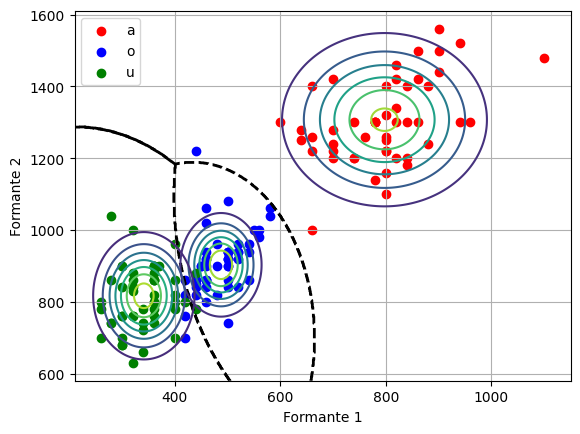

In [23]:
#b)

def mis_parametros_GNB(X, y):

    clases = np.unique(y)
    N = len(clases)
    n_features = X.shape[1]

    # Inicializo
    means = np.zeros((N, n_features))
    variances = np.zeros((N, n_features))
    p_priori = np.zeros(N)

    # Para cada clase, calculo la media, varianza y probabilidad a priori
    for i, c in enumerate(clases):
        X_c = X[y == c]
        means[i] = np.mean(X_c, axis=0)
        variances[i] = np.var(X_c, axis=0)
        p_priori[i] = len(X_c) / len(X)

    # Diagonales

    sigmas = np.zeros((N, n_features, n_features))
    for i in range(N):
        sigmas[i] = np.diag(variances[i])

    return means, sigmas, p_priori

means, sigmas, p_priori = mis_parametros_GNB(X_train, y_train)

pdf_a = multivariate_normal(mean = means[0].reshape(-1), cov = sigmas[0])
pdf_o = multivariate_normal(mean = means[1].reshape(-1), cov = sigmas[1])
pdf_u = multivariate_normal(mean = means[2].reshape(-1), cov = sigmas[2])


concat_x = np.concatenate((form_a[:,0], form_o[:,0], form_u[:,0]))
concat_y = np.concatenate((form_a[:,1], form_o[:,1], form_u[:,1]))

# Defino los límites 
x = np.linspace(np.min(concat_x) - 50, np.max(concat_x) + 50, 1000)
y = np.linspace(np.min(concat_y) - 50, np.max(concat_y) + 50, 1000)
X, Y = np.meshgrid(x, y)

# Calculo las densidades de probabilidad para cada clase
Z_a = pdf_a.pdf(np.dstack((X, Y)))
Z_o = pdf_o.pdf(np.dstack((X, Y)))
Z_u = pdf_u.pdf(np.dstack((X, Y)))

# Calculo la frontera de decisión
posterior_a = pdf_a.pdf(np.dstack((X, Y))) * p_priori[0]
posterior_o = pdf_o.pdf(np.dstack((X, Y))) * p_priori[1]
posterior_u = pdf_u.pdf(np.dstack((X, Y))) * p_priori[2]

# Determina la clase más probable para cada punto de la malla
Z = np.argmax(np.stack([posterior_a, posterior_o, posterior_u], axis=0), axis=0)
# Grafica las fronteras de decisión
plt.contour(X, Y, Z, levels=[-1, 0, 1], colors='black', linewidths=2, linestyles='dashed')

# Grafico las curvas de nivel
plt.contour(X, Y, Z_a)
plt.contour(X, Y, Z_o)
plt.contour(X, Y, Z_u)
plt.scatter(form_a[:, 0], form_a[:, 1], color='red', label='a')
plt.scatter(form_o[:, 0], form_o[:, 1], color='blue', label='o')
plt.scatter(form_u[:, 0], form_u[:, 1], color='green', label='u')
plt.xlabel('Formante 1')
plt.ylabel('Formante 2')
plt.legend()
plt.grid()



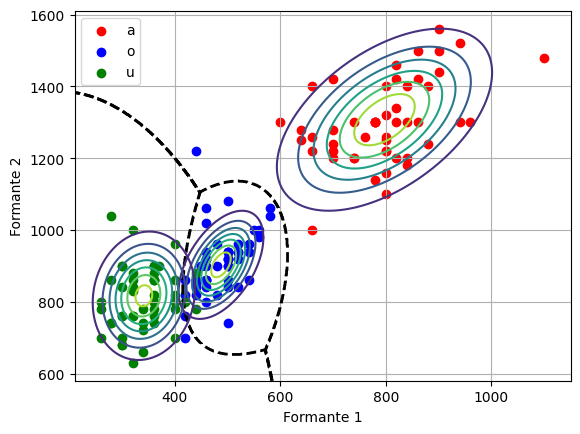

In [22]:
# c) Idem anterior pero con QDA y LDA

# QDA
def mis_parametros_QDA(X, y):

    clases = np.unique(y)
    N = len(clases)
    n_features = X.shape[1]

    # Inicializo
    means = np.zeros((N, n_features))
    covs = np.zeros((N, n_features, n_features))
    p_priori = np.zeros(N)

    # Para cada clase, calculo la media, varianza y probabilidad a priori
    for i, c in enumerate(clases):
        X_c = X[y == c]
        means[i] = np.mean(X_c, axis=0)
        covs[i] = np.cov(X_c, rowvar=False)
        p_priori[i] = len(X_c) / len(X)

    return means, covs, p_priori


medias, sigmas, probs_priori = mis_parametros_QDA(X_train, y_train)

pdf_a = multivariate_normal(mean = means[0].reshape(-1), cov = sigmas[0])
pdf_o = multivariate_normal(mean = means[1].reshape(-1), cov = sigmas[1])
pdf_u = multivariate_normal(mean = means[2].reshape(-1), cov = sigmas[2])


concat_x = np.concatenate((form_a[:,0], form_o[:,0], form_u[:,0]))
concat_y = np.concatenate((form_a[:,1], form_o[:,1], form_u[:,1]))

# Defino los límites 
x = np.linspace(np.min(concat_x) - 50, np.max(concat_x) + 50, 1000)
y = np.linspace(np.min(concat_y) - 50, np.max(concat_y) + 50, 1000)
X, Y = np.meshgrid(x, y)

# Calculo las densidades de probabilidad para cada clase
Z_a = pdf_a.pdf(np.dstack((X, Y)))
Z_o = pdf_o.pdf(np.dstack((X, Y)))
Z_u = pdf_u.pdf(np.dstack((X, Y)))

# Calculo la frontera de decisión
posterior_a = pdf_a.pdf(np.dstack((X, Y))) * p_priori[0]
posterior_o = pdf_o.pdf(np.dstack((X, Y))) * p_priori[1]
posterior_u = pdf_u.pdf(np.dstack((X, Y))) * p_priori[2]

# Determina la clase más probable para cada punto de la malla
Z = np.argmax(np.stack([posterior_a, posterior_o, posterior_u], axis=0), axis=0)
# Grafica las fronteras de decisión
plt.contour(X, Y, Z, levels=[-1, 0, 1], colors='black', linewidths=2, linestyles='dashed')

# Grafico las curvas de nivel
plt.contour(X, Y, Z_a)
plt.contour(X, Y, Z_o)
plt.contour(X, Y, Z_u)
plt.scatter(form_a[:, 0], form_a[:, 1], color='red', label='a')
plt.scatter(form_o[:, 0], form_o[:, 1], color='blue', label='o')
plt.scatter(form_u[:, 0], form_u[:, 1], color='green', label='u')
plt.xlabel('Formante 1')
plt.ylabel('Formante 2')
plt.legend()
plt.grid()





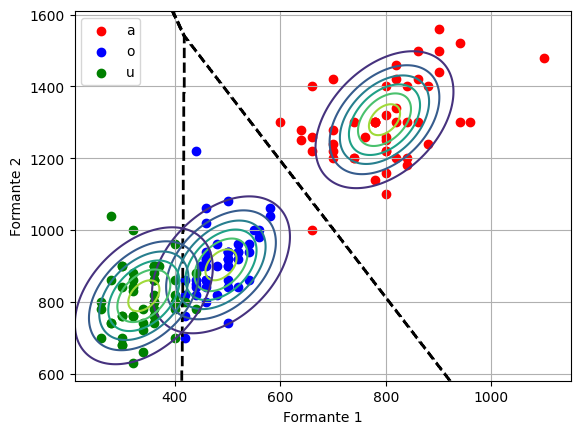

In [24]:
# LDA
def mis_parametros_LDA(X, y):

    
    clases = np.unique(y)
    n = len(X)
    N = len(clases)
    n_features = X.shape[1] # Esto es Dk

    # Inicializo
    means = np.zeros((N, n_features))
    cov = np.zeros((n_features, n_features))
    p_priori = np.zeros(N)

    # Para cada clase, calculo la media, varianza y probabilidad a priori
    for i, c in enumerate(clases):
        X_c = X[y == c]
        means[i] = np.mean(X_c, axis=0)
        cov += (len(X[y == c]) - 1) * np.cov(X_c, rowvar=False)
        p_priori[i] = len(X_c) / len(X)

    cov = cov / (n - N)

    return means, cov, p_priori



medias, sigma, probs_priori = mis_parametros_LDA(X_train, y_train)

pdf_a = multivariate_normal(mean = means[0].reshape(-1), cov = sigma)
pdf_o = multivariate_normal(mean = means[1].reshape(-1), cov = sigma)
pdf_u = multivariate_normal(mean = means[2].reshape(-1), cov = sigma)


concat_x = np.concatenate((form_a[:,0], form_o[:,0], form_u[:,0]))
concat_y = np.concatenate((form_a[:,1], form_o[:,1], form_u[:,1]))

# Defino los límites 
x = np.linspace(np.min(concat_x) - 50, np.max(concat_x) + 50, 1000)
y = np.linspace(np.min(concat_y) - 50, np.max(concat_y) + 50, 1000)
X, Y = np.meshgrid(x, y)

# Calculo las densidades de probabilidad para cada clase
Z_a = pdf_a.pdf(np.dstack((X, Y)))
Z_o = pdf_o.pdf(np.dstack((X, Y)))
Z_u = pdf_u.pdf(np.dstack((X, Y)))

# Calculo la frontera de decisión
posterior_a = pdf_a.pdf(np.dstack((X, Y))) * p_priori[0]
posterior_o = pdf_o.pdf(np.dstack((X, Y))) * p_priori[1]
posterior_u = pdf_u.pdf(np.dstack((X, Y))) * p_priori[2]

# Determina la clase más probable para cada punto de la malla
Z = np.argmax(np.stack([posterior_a, posterior_o, posterior_u], axis=0), axis=0)
# Grafica las fronteras de decisión
plt.contour(X, Y, Z, levels=[-1, 0, 1], colors='black', linewidths=2, linestyles='dashed')

# Grafico las curvas de nivel
plt.contour(X, Y, Z_a)
plt.contour(X, Y, Z_o)
plt.contour(X, Y, Z_u)
plt.scatter(form_a[:, 0], form_a[:, 1], color='red', label='a')
plt.scatter(form_o[:, 0], form_o[:, 1], color='blue', label='o')
plt.scatter(form_u[:, 0], form_u[:, 1], color='green', label='u')
plt.xlabel('Formante 1')
plt.ylabel('Formante 2')
plt.legend()
plt.grid()





In [26]:
# d) Clasificar el conj. de testeo con c/metodo


def mi_clasificador_GNB(X, means, sigmas, p_priori):
    N = len(means)
    p_posteriori = np.zeros((len(X), N))
    for i in range(N):
        p_posteriori[:, i] = multivariate_normal.pdf(X, mean=means[i], cov=sigmas[i]) * p_priori[i]

    return np.argmax(p_posteriori, axis=1)

def mi_clasificador_QDA(X, means, covs, p_priori):
    N = len(means)
    p_posteriori = np.zeros((len(X), N))
    for i in range(N):
        p_posteriori[:, i] = multivariate_normal.pdf(X, mean=means[i], cov=covs[i]) * p_priori[i]

    return np.argmax(p_posteriori, axis=1)

def mi_clasificador_LDA(X, means, sigma, p_priori):
    N = len(means)
    p_posteriori = np.zeros((len(X), N))
    for i in range(N):
        p_posteriori[:, i] = multivariate_normal.pdf(X, mean=means[i], cov=sigma) * p_priori[i]

    return np.argmax(p_posteriori, axis=1)   


# Calculo usando GNB
medias, sigmas, p_priori = mis_parametros_GNB(X_train, y_train)
y_pred_GNB = mi_clasificador_GNB(X_test, medias, sigmas, p_priori)
# Mapeo las predicciones a las etiquetas originales
y_pred_GNB = np.array(['a', 'o', 'u'])[y_pred_GNB]
err = np.mean(y_pred_GNB != y_test)
print(f'Error de GNB: {err:.5f}')

# Calculo usando QDA
means, sigmas, p_priori = mis_parametros_QDA(X_train, y_train)
y_pred_QDA = mi_clasificador_QDA(X_test, means, sigmas, p_priori)
# Mapeo las predicciones a las etiquetas originales
y_pred_QDA = np.array(['a', 'o', 'u'])[y_pred_QDA]
err = np.mean(y_pred_QDA != y_test)
print(f'Error de QDA: {err:.5f}')

# Calculo usando LDA
means, sigma, p_priori = mis_parametros_LDA(X_train, y_train)
y_pred_LDA = mi_clasificador_LDA(X_test, means, sigma, p_priori)
# Mapeo las predicciones a las etiquetas originales
y_pred_LDA = np.array(['a', 'o', 'u'])[y_pred_LDA]
err = np.mean(y_pred_LDA != y_test)
print(f'Error de LDA: {err:.5f}')






Error de GNB: 0.06667
Error de QDA: 0.04444
Error de LDA: 0.00000


### Ejercicio 3

![image.png](enunciados/ej3.png)

In [3]:
# a) Cargar los datos

newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))



In [4]:
# b) Vectorizar los datos y separar en conjuntos de entrenamiento y testeo
vectorizer = CountVectorizer(lowercase=True, stop_words='english', max_df=0.95, min_df=2)

# Separo en conjuntos de entrenamiento y testeo, y sus etiquetas
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
y_train = newsgroups_train.target
y_test = newsgroups_test.target

In [7]:
# c) y d)

n_palabras = X_train.shape[1]
n_clases = len(np.unique(y_train))
alpha = np.ones(n_palabras) 

Ñ = np.zeros((n_clases, n_palabras))

for i in range(n_clases):
    indices_clase = np.where(y_train == i)[0] # Indices de los documentos de la clase i
    Ñ[i, :] = X_train[indices_clase, :].sum(axis=0)   # Sumo las ocurrencias de cada palabra en los documentos de la clase i

theta = (Ñ + alpha) / (Ñ.sum(axis=1).reshape(-1, 1) + alpha.sum())

def clasif_MNB(X, theta):
    ck = np.bincount(y_train) / len(y_train)
    return np.argmax(np.log(ck) + X @ np.log(theta.T), axis=1)

y_pred = clasif_MNB(X_test, theta)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.5f}')


Accuracy: 0.65109


In [8]:
# c) y d) con MultinomialNB de sklearn
# Entreno el modelo con alpha = 1
mnb = MultinomialNB(alpha=1.0)
mnb.fit(X_train, y_train)

# Predecir
y_pred = mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6511


### Ejercicio 4

![image.png](enunciados/ej4.png)

In [10]:
# Datos del ejercicio 3.6

# Parametros
pesos = [0.1, 0.4, 0.2, 0.3]
medias = [-4, 0, 4, 5]
varianzas = [1, 1.96, 1.44, 1]
desv = np.sqrt(varianzas)
n_muestras = 100
K = 6

# Lista vacia
muestras = []

# Generamos las muestras de la mezcla

for _ in range(n_muestras):
    # Sorteamos una de las gaussianas
    indice_gaussiana = np.random.choice(len(pesos), p=pesos)
    # Generamos la muestra
    muestra = np.random.normal(medias[indice_gaussiana], desv[indice_gaussiana])
    muestras.append(muestra)

# Convierto en array()
muestras = np.array(muestras)

gm = GaussianMixture(n_components=K, max_iter=1000, tol=1e-5)
gm.fit(muestras.reshape(-1,1))

pesos_gm = gm.weights_
medias_gm = gm.means_.flatten()
varianzas_gm = gm.covariances_.flatten()




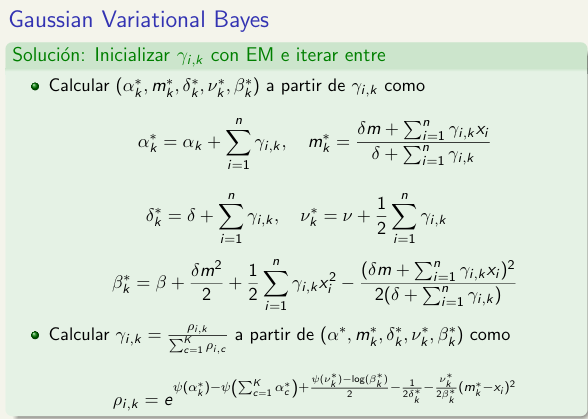

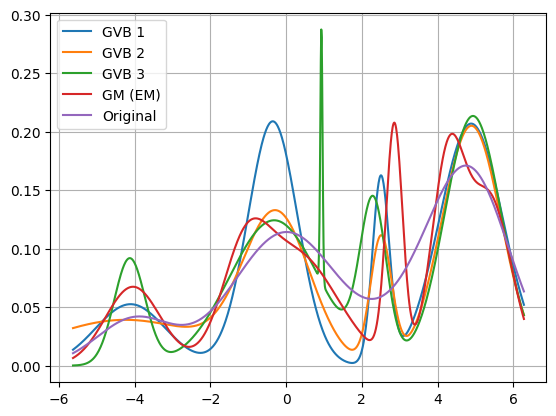

In [12]:
# a) #DIAP 28

# Probabilidades a posteriori
gamma = gm.predict_proba(muestras.reshape(-1,1)).T 


N_k = np.sum(gamma, axis=1)
f_k = np.sum(gamma * muestras, axis=1)
s_k = np.sum(gamma * muestras**2, axis=1)


delta_prior = nu_prior = beta_prior = 0.05
alpha_prior = np.array([1, 1, 1, 1, 1, 1])
m_prior = 0

max_iter = 1000

for i in range(max_iter):
    alpha_post = alpha_prior + N_k
    m_post = (m_prior * delta_prior + f_k) / (N_k + delta_prior)
    delta_post = delta_prior + N_k
    nu_post = nu_prior + N_k / 2
    beta_post = beta_prior + (delta_prior * m_prior**2) / 2 + s_k / 2 - ((delta_prior * m_prior + f_k)**2) / ((delta_prior + N_k)* 2)
    result = (digamma(alpha_post) - digamma(np.sum(alpha_post)) + (digamma(nu_post) - np.log(beta_post))/2 - 1/(2 * delta_post))[:, np.newaxis] - (nu_post/(2 * beta_post))[:,np.newaxis] * (m_post[:,np.newaxis] - muestras)**2
    rho = np.exp(result)
    # Normalizo 
    gamma = rho / np.sum(rho, axis=0)
    # Actualizo los parámetros
    N_k = np.sum(gamma, axis=1)
    f_k = np.sum(gamma * muestras, axis=1)
    s_k = np.sum(gamma * muestras**2, axis=1)



n_muestras = 3

# Lambda es una gamma(nu, beta)
lambda_p = np.random.gamma(nu_post, 1/beta_post, size=(n_muestras, K))
# Pi es una dirichlet(alpha)
pi_p = np.random.dirichlet(alpha_post, size=n_muestras)
# Mu es una normal(m, 1/(delta * lambda))
mu_p = np.random.normal(m_post, 1/np.sqrt(delta_post * lambda_p), size=(n_muestras, K))

xx = np.linspace(np.min(muestras), np.max(muestras), 1000)

#Inicializo vectores de resultados para la mezcla
dens_gvb = np.zeros((len(xx), n_muestras))
dens_gm = np.zeros_like(xx)
dens_real = np.zeros_like(xx)


# Calculo dens de la mezcla de gaussianas

for k in range(K):
        # Calcular la densidad de probabilidad normal para la componente k para los 3 parámetros
    pdf_k = normal.pdf(xx[:, np.newaxis], mu_p[:, k], 1/lambda_p[:, k]) # (1000 x 3)
    # Sumar ponderando por pi_param
    dens_gvb += pi_p[:, k] * pdf_k
    if k < 4:
        dens_real += pesos[k] * normal.pdf(xx, medias[k], np.sqrt(varianzas[k]))
    dens_gm += pesos_gm[k] * normal.pdf(xx, medias_gm[k], np.sqrt(varianzas_gm[k]))



plt.figure()
plt.plot(xx, dens_gvb[:,0], label= "GVB 1")
plt.plot(xx, dens_gvb[:,1], label= "GVB 2")
plt.plot(xx, dens_gvb[:,2], label= "GVB 3")
plt.plot(xx, dens_gm, label = "GM (EM)")
plt.plot(xx, dens_real, label= "Original")
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

    

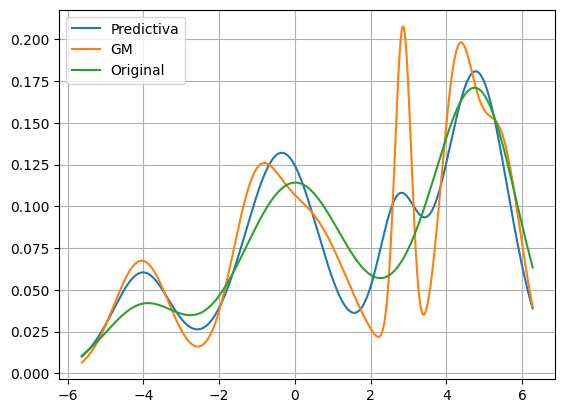

In [13]:
# b) Densisad predictiva

def t_student_gral(x, mu, lambda2, nu):

    a = scipy.special.gamma((nu + 1)/2) / scipy.special.gamma(nu/2)
    b = np.sqrt(lambda2/(np.pi * nu))
    c = (1 + lambda2/nu * (x - mu)**2)**(-(nu + 1)/2)
    return a * b * c 


# Inicializo

prob_pred = np.zeros_like(xx.reshape(-1, 1))
mu_post = m_post
lambda_post = delta_post * nu_post / ((delta_post + 1) * beta_post)
nu_post = 2 * nu_post


for i in range(K):
    prob_pred += alpha_post[i]/np.sum(alpha_post) * t_student_gral(xx[:, np.newaxis], mu_post[i], lambda_post[i], nu_post[i])


plt.figure()
plt.plot(xx, prob_pred, label= "Predictiva")
plt.plot(xx, dens_gm, label= "GM")
plt.plot(xx, dens_real, label= "Original")
plt.grid(True)
plt.legend()
plt.show()


### Ejercicio 5

![image.png](enunciados/ej5.png)

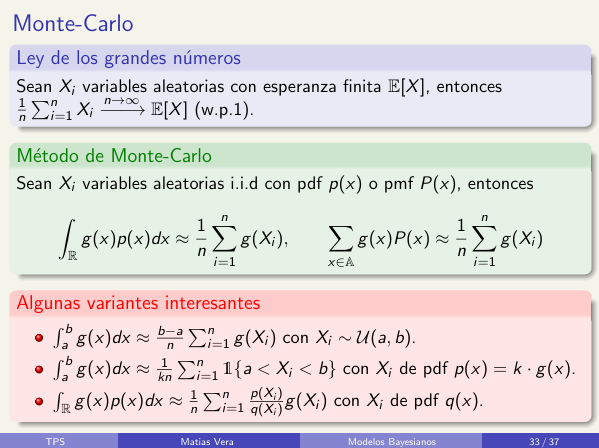

In [2]:
# Función a integrar
def funcion(t):
    return np.exp(-t**2 / 2) / np.sqrt(2 * np.pi)

# Valor exacto de la integral
valor_real = 0.81859

# Límites de integración
a, b = -1, 2
n_puntos = 20
n_experimentos = 100


In [4]:
# (a) Variables aleatorias uniformes

resultados_acum = 0


for _ in range(n_experimentos):
    # Generar puntos uniformes en el intervalo [a, b]
    x_uniforme = np.random.uniform(a, b, n_puntos)
    # Evaluar la función en esos puntos
    estimacion = funcion(x_uniforme)
    resultado = (b - a)/n_puntos * np.sum(estimacion)
    resultados_acum += resultado

resultados_prm = resultados_acum / n_experimentos
error_prm = np.abs(valor_real - resultados_prm)

print(f"Valor real {valor_real:.4f}")
print(f"Promedio de resultados {resultados_prm:.4f}")
print(f"Error promedio: {error_prm:.4f}")

Valor real 0.8186
Promedio de resultados 0.8174
Error promedio: 0.0012


In [5]:
# (b) Variables aleatorias normales

media = 0
var = 1

resultados_acum = 0


for _ in range(n_experimentos):
    x_normal = np.random.normal(media, var, n_puntos)
    aux = np.sum((x_normal >= a) & (x_normal <= b))
    resultado = np.sum(aux) / n_puntos
    resultados_acum += resultado


resultados_prm = resultados_acum / n_experimentos
error_prm = np.abs(valor_real - resultados_prm)

print(f"Valor real {valor_real:.4f}")
print(f"Promedio de resultados {resultados_prm:.4f}")
print(f"Error promedio: {error_prm:.4f}")


Valor real 0.8186
Promedio de resultados 0.8165
Error promedio: 0.0021
